In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
path = 'c:\Hivatalos\DataScientist\StorageData_GIE_2011-01-01_2022-07-11.xlsx'
df = pd.read_excel(path)

df.shape

(4210, 9)

In [92]:
df.head()

,GasDayStart,GasInStorageTWh,FullPercentage,TrendPercentage,InjectionGWhD,WithdrawalGWhD,Working(Gas)VolumeTWh,InjectionCapacityGWhD,WithdrawalCapacityGWhD
0,2022-07-11,692.5154,62.34,0.25,3603.45,787.1,1110.8691,11711.99,19859.52
1,2022-07-10,689.9400,62.11,0.47,5429.34,178.9,1110.8589,11712.22,19857.76
2,2022-07-09,684.7977,61.65,0.48,5473.00,173.9,1110.8589,11712.69,19856.52
3,2022-07-08,679.6126,61.18,0.35,4333.53,420.0,1110.8589,11712.96,19855.80
4,2022-07-07,675.8310,60.84,0.35,4411.06,516.7,1110.8589,11713.11,19855.39


In [93]:
df.describe()

,GasInStorageTWh,FullPercentage,TrendPercentage,InjectionGWhD,WithdrawalGWhD,Working(Gas)VolumeTWh,InjectionCapacityGWhD,WithdrawalCapacityGWhD
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,629.234188,63.018881,0.000893,1914.484214,1894.118694,1003.030956,10090.040128,17515.544363
std,228.242201,20.722883,0.355025,1648.667052,2322.914171,152.960614,2073.388395,3020.821327
min,193.839800,17.720000,-1.060000,18.170000,6.100000,617.509900,5392.470000,10271.030000
25%,442.756725,46.590000,-0.280000,330.252500,216.325000,927.913950,8602.985000,15845.600000
50%,618.311150,64.335000,0.110000,1606.755000,631.200000,1102.522500,11268.875000,19264.580000
75%,808.372975,81.587500,0.300000,3223.922500,3097.950000,1112.510400,11839.022500,19854.180000
max,1098.864900,97.840000,0.580000,6766.150000,11821.700000,1134.652600,12121.260000,20653.950000


In [4]:
cdf = df[['GasDayStart','GasInStorageTWh','InjectionGWhD','WithdrawalGWhD']]
cdf.head(9)

,GasDayStart,GasInStorageTWh,InjectionGWhD,WithdrawalGWhD
0,2022-07-11,692.5154,3603.45,787.1
1,2022-07-10,689.9400,5429.34,178.9
2,2022-07-09,684.7977,5473.00,173.9
3,2022-07-08,679.6126,4333.53,420.0
4,2022-07-07,675.8310,4411.06,516.7
5,2022-07-06,672.0230,4368.57,366.3
6,2022-07-05,668.1030,4252.63,272.6
7,2022-07-04,664.2840,4410.40,261.4
8,2022-07-03,660.2152,5289.58,230.9


In [5]:
df['GasDayStart'] = pd.to_datetime(df['GasDayStart'])
cdf['GasDayStart'] = pd.to_datetime(cdf['GasDayStart'])

C:\Users\galen\AppData\Local\Temp\ipykernel_21076\3792269071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['GasDayStart'] = pd.to_datetime(cdf['GasDayStart'])


In [6]:
cdf.head()

,GasDayStart,GasInStorageTWh,InjectionGWhD,WithdrawalGWhD
0,2022-07-11,692.5154,3603.45,787.1
1,2022-07-10,689.9400,5429.34,178.9
2,2022-07-09,684.7977,5473.00,173.9
3,2022-07-08,679.6126,4333.53,420.0
4,2022-07-07,675.8310,4411.06,516.7


In [7]:
df['Year'] = df['GasDayStart'].dt.year
cdf['Year'] = cdf['GasDayStart'].dt.year

C:\Users\galen\AppData\Local\Temp\ipykernel_21076\1512906971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Year'] = cdf['GasDayStart'].dt.year


In [8]:
cdf.dtypes

GasDayStart        datetime64[ns]
GasInStorageTWh           float64
InjectionGWhD             float64
WithdrawalGWhD            float64
Year                        int64
dtype: object

In [111]:
# Use GroupBy() to compute the sum
cdf2 = cdf.groupby('Year').sum()
print(cdf2)

      GasInStorageTWh  InjectionGWhD  WithdrawalGWhD
Year                                                
2011      172454.3526      400772.58        328661.6
2012      200858.6879      486424.39        466522.2
2013      183419.7110      608726.75        624654.6
2014      250895.1946      575173.36        503694.0
2015      219022.5732      704896.83        732753.0
2016      257319.5374      740638.56        789397.0
2017      227793.9917      849431.59        838997.2
2018      221908.8613      908277.99        842838.7
2019      291689.5784      848981.24        621088.2
2020      323229.5927      684466.62        834063.5
2021      216720.7899      728624.59        964236.4
2022       83763.0627      523564.04        427333.3


In [119]:
if (cdf['Year'] < 2022).bool:
    cdf3 = cdf2 / 12
else:
    cdf3 = cdf2 / 7
    
print(cdf3)

      GasInStorageTWh  InjectionGWhD  WithdrawalGWhD
Year                                                
2011     14371.196050   33397.715000    27388.466667
2012     16738.223992   40535.365833    38876.850000
2013     15284.975917   50727.229167    52054.550000
2014     20907.932883   47931.113333    41974.500000
2015     18251.881100   58741.402500    61062.750000
2016     21443.294783   61719.880000    65783.083333
2017     18982.832642   70785.965833    69916.433333
2018     18492.405108   75689.832500    70236.558333
2019     24307.464867   70748.436667    51757.350000
2020     26935.799392   57038.885000    69505.291667
2021     18060.065825   60718.715833    80353.033333
2022      6980.255225   43630.336667    35611.108333


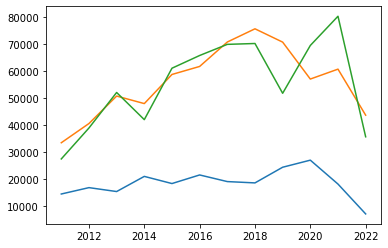

In [120]:
#cdf2.lineplot()
plt.plot(cdf3)

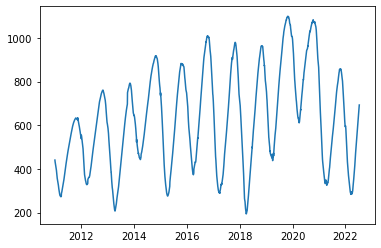

In [110]:
plt.plot(df.GasDayStart, df.GasInStorageTWh)

In [100]:
cdf2.dtypes

GasInStorageTWh    float64
InjectionGWhD      float64
WithdrawalGWhD     float64
dtype: object

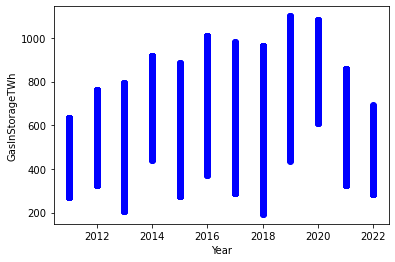

In [106]:
plt.scatter(cdf.Year, cdf.GasInStorageTWh,  color='blue')
plt.xlabel("Year")
plt.ylabel("GasInStorageTWh")
plt.show()

<AxesSubplot:ylabel='Frequency'>

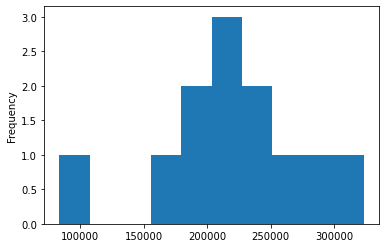

In [102]:
cdf2['GasInStorageTWh'].plot(kind='hist')

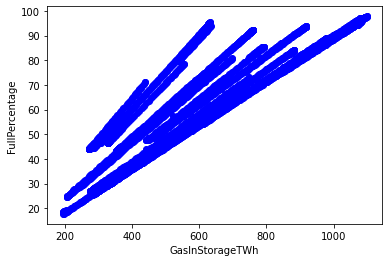

In [103]:
plt.scatter(df.GasInStorageTWh, df.FullPercentage,  color='blue')
plt.xlabel("GasInStorageTWh")
plt.ylabel("FullPercentage")
plt.show()

In [ ]:
df_gas['Year'] = df_gas['gasDayStart'].dt.year
df_gas_filtered = df_gas[['Year','gasDayStart','gasInStorage','injection','withdrawal']]
df_gas_filtered['gasInStorage'] = pd.to_numeric(df_gas_filtered['gasInStorage'],errors = 'coerce')
df_gas_filtered['injection'] = pd.to_numeric(df_gas_filtered['injection'],errors = 'coerce')
df_gas_filtered['withdrawal'] = pd.to_numeric(df_gas_filtered['withdrawal'],errors = 'coerce')
df_gas_filtered['gasInStorage'] = df_gas_filtered['gasInStorage']*1000
df_gas_grouped = df_gas_filtered.groupby('Year').mean()
df_gas_grouped

In [ ]:
import seaborn as sns
sns.lineplot(data = df_gas_grouped['gasInStorage'])